<a href="https://colab.research.google.com/github/shashvatshah9/DLCodeDemo/blob/main/DL_Demo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torchvision

In [ ]:
# Common torchvision code

In [ ]:
a = np.random.rand(2,3)
b = torch.from_numpy(a)

print(a)
print(b)

[[0.99440064 0.7295853  0.07292851]
 [0.96620492 0.33003035 0.10814416]]
tensor([[0.9944, 0.7296, 0.0729],
        [0.9662, 0.3300, 0.1081]], dtype=torch.float64)


In [ ]:
print(b+1)
print(torch.sin(b))

tensor([[1.9944, 1.7296, 1.0729],
        [1.9662, 1.3300, 1.1081]], dtype=torch.float64)
tensor([[0.8384, 0.6666, 0.0729],
        [0.8227, 0.3241, 0.1079]], dtype=torch.float64)


In [ ]:
A = torch.rand(2,2)
b = torch.rand(2,1)
x = torch.rand(2,1, requires_grad=True)
y = torch.matmul(A, x) + b
print(x)
print(y)

tensor([[0.6767],
        [0.2427]], requires_grad=True)
tensor([[1.3935],
        [0.8049]], grad_fn=<AddBackward0>)


In [ ]:
z = y.sum()
print(z)

tensor(2.1984, grad_fn=<SumBackward0>)


In [ ]:
z.backward()

In [ ]:
print(x)
print(x.grad)

tensor([[0.6767],
        [0.2427]], requires_grad=True)
tensor([[1.0837],
        [1.8186]])


In [12]:
trainindata = torchvision.datasets.FashionMNIST('./FashionMNIST', train = True, download = True, transform = torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST', train = False, download = True, transform = torchvision.transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



In [14]:
print(len(trainindata))
print(len(testdata))


60000
10000


In [16]:
image, label = trainindata[0]
print(image.shape, label)

torch.Size([1, 28, 28]) 9


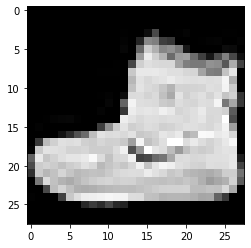

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(image.squeeze(), cmap=plt.cm.gray)

In [18]:
trainDataLoader = torch.utils.data.DataLoader(trainindata, batch_size = 64, shuffle=True)
testDataLoader = torch.utils.data.DataLoader(trainindata, batch_size = 64, shuffle=False)


In [20]:
images, labels = next(iter(trainDataLoader))
print(images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


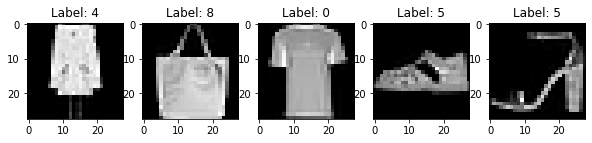

In [22]:
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.title("Label: " + str(labels[i].item()))
    plt.imshow(images[i].squeeze(), cmap=plt.cm.gray)

In [24]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(in_features=28*28, out_features=10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.linear(x)

In [25]:
# model
model = LinearModel().cuda()
# loss
loss = torch.nn.CrossEntropyLoss()
# optimizer
optim = torch.optim.SGD(model.parameters(), lr = 0.01)


In [30]:
train_loss_history = []
test_loss_history = []

# train for 20 epochs (go through entire dataset 20 times)

for epoch in range(20):
    train_loss = 0.0
    test_loss = 0.0

    # train
    model.train()
    for i, data in enumerate(trainDataLoader):
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()

        # in the training loop reset all the training params
        optim.zero_grad()

        # forward propagation
        pred_output = model(images)
        fit = loss(pred_output, labels)

        # back propagation
        fit.backward()

        # update the weights
        optim.step()
        train_loss += fit.item()
    
    # test
    model.eval()

    for i, data in enumerate(testDataLoader):
        with torch.no_grad():
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()

            pred_output = model(images)
            fit = loss(pred_output, labels)
            test_loss += fit.item()
    
    train_loss = train_loss/len(trainDataLoader)
    test_loss = test_loss/len(testDataLoader) 
    train_loss_history.append(train_loss)
    test_loss_history.append(test_loss)
    print(f'Epoch {epoch}, Train Loss {train_loss}, Test Loss {test_loss}')


Epoch 0, Train Loss 0.4452777984363438, Test Loss 0.44300377295850946
Epoch 1, Train Loss 0.44347036971466375, Test Loss 0.44273254118049576
Epoch 2, Train Loss 0.4414846378761822, Test Loss 0.4419962194428515
Epoch 3, Train Loss 0.4399192029479216, Test Loss 0.43828814562513374
Epoch 4, Train Loss 0.43838233322794756, Test Loss 0.4379470172816756
Epoch 5, Train Loss 0.4371537190478748, Test Loss 0.43566512488035253
Epoch 6, Train Loss 0.43523794263283583, Test Loss 0.4335256984302484
Epoch 7, Train Loss 0.4339937783920689, Test Loss 0.4351336312478285
Epoch 8, Train Loss 0.4328987089269705, Test Loss 0.43085793704429926
Epoch 9, Train Loss 0.4314997397474389, Test Loss 0.42950490190149115
Epoch 10, Train Loss 0.43039333237323174, Test Loss 0.4299173485050832
Epoch 11, Train Loss 0.429381963016509, Test Loss 0.4290099791658204
Epoch 12, Train Loss 0.4283701132800279, Test Loss 0.4266361018329033


TypeError: ignored

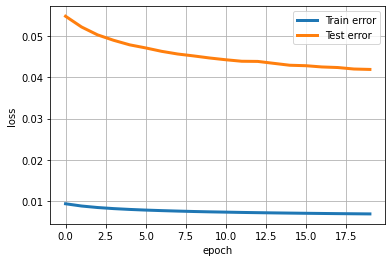

In [29]:
plt.plot(train_loss_history, label='Train error', linewidth=3)
plt.plot(test_loss_history, label='Test error', linewidth=3)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()